# Submission Dicoding Belajar Machine Learning Untuk Pemula

Kriteria yang harus dipenuhi pada program:

    -Dataset harus dibagi menjadi train set dan validation set.
    -Harus mengimplementasikan augmentasi gambar.
    -Menggunakan image data generator.
    -Model harus menggunakan model sequential.
    -Pelatihan model tidak melebihi waktu 30 menit.
    -Program dikerjakan pada Google Colaboratory.
    -Akurasi dari model minimal 85%.
    -Dapat memprediksi gambar yang diunggah ke Colab

==============================================================================================

# Rock, Paper & Scissors dengan TensorFlow

## 1. Setup dan Import Library

Input library yang dibutuhkan dalam load dataset seperti gambar dalam folder,data gambar dll. 

1.   Install split-folder untuk memisahkan file (Membagi folder dengan file (misal Gambar) menjadi folder data latih, validation, dan test (dataset).
2.   Input Library untuk Dataset


In [ ]:
pip install split-folders

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sp
import itertools
import split_folders
import zipfile,os
import cv2



## 2. Import Library TensorFlow, Keras dan Masukkan Dataset

Masukan library model Deep Learning yang dipilih. Masukan layer, model, praproses gambar, dan optimasi pada metode Convolutional Neural Network.

Dataset yang didapat adalah yang sudah disediakan oleh Dicoding

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

print(tf.__version__)

2.2.0


In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-06-16 11:27:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.48MB/s    in 55s     

2020-06-16 11:28:04 (5.60 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## 3. Memisahkan Data Latih dan Validasi

Langkah selanjutnya adalah memisahkan data menjadi 2 bagian yaitu Data Train(Latih) dan Data Validasi dengan rasio yang diinginkan misalkan (80:20).

Dengan menguji model, kita dapat melihat kesalahan yang dibuat dan memperbaikinya sebelum mulai membawa model kita ke tahap selanjutnya

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/", seed=1337, ratio=(.8, .2))
split_folders.fixed('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/", seed=1337, fixed=(100, 100), oversample=False) 

data_dir = '/tmp/rockpaperscissors/'
training_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'val')

print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/rock'))) 
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))



Copying files: 2188 files [00:01, 1428.56 files/s]
Copying files: 2188 files [00:03, 638.16 files/s]

712
726
750


In [ ]:
training_paper_dir = os.path.join(training_dir, 'paper')
training_rock_dir = os.path.join(training_dir, 'rock')
training_scissors_dir = os.path.join(training_dir, 'scissors')

validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

In [ ]:
paper_imgs = os.listdir(training_paper_dir)
rock_imgs = os.listdir(training_rock_dir)
scissors_imgs = os.listdir(training_scissors_dir)

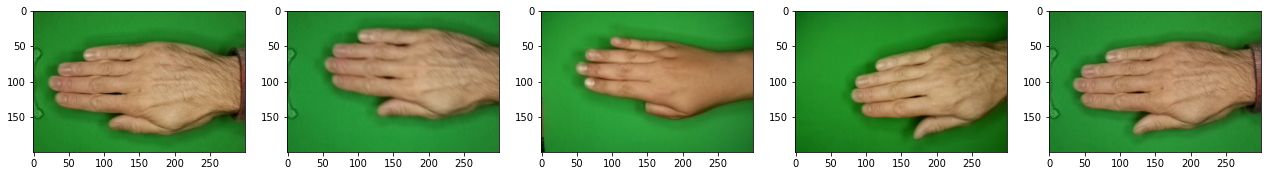

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(paper_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_paper_dir, img_path))
    plt.imshow(img)
plt.show()

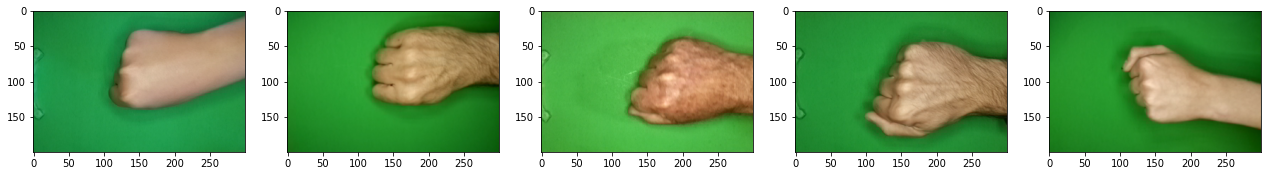

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(rock_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_rock_dir, img_path))
    plt.imshow(img)
plt.show()

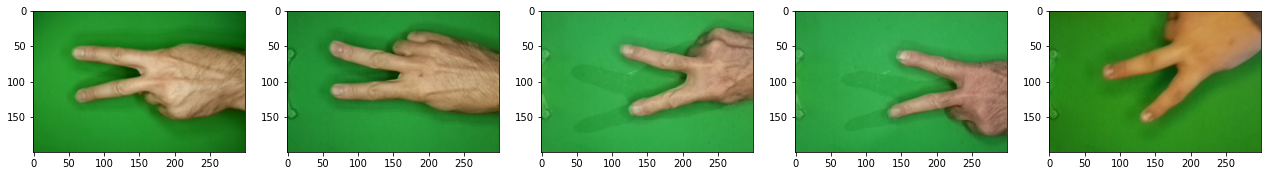

In [ ]:
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(scissors_imgs[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(training_scissors_dir, img_path))
    plt.imshow(img)
plt.show()

## 4. Augmentasi Data Gambar

Augmentasi data gambar menggunakan metode ImageDataGenerator. Augmentasi data gambar berfungsi untuk menambahkan dataset gambar dengan cara memperbesar gambar, memotong gambar, dan memanipulasi gambar namun tanpa menghilangkan inti dari data tersebut.

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255, validation_split= 0.5, shear_range = 0.2, zoom_range= 0.2, rotation_range= 20, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split= 0.5)

In [ ]:
train_generator = train_datagen.flow_from_directory(
            training_dir, 
            target_size=(100,100), 
            batch_size=32, 
            class_mode='categorical',
            shuffle=True
)

valid_generator = validation_datagen.flow_from_directory(
            validation_dir, 
            target_size=(100,100), 
            batch_size=32, 
            class_mode='categorical',
            shuffle=True,
            subset='validation'
)

Found 1749 images belonging to 3 classes.
Found 328 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
valid_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

## 5. Melatih sebuah model Convolutional Neural Network

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)       

## 6. Kompilasi Model & Alur Pelatihan

Metode selanjutnya menggunakan model yang akan dikompilasi. Penggunaan model ini agar menentukan optimasi dari model dataset tadi. Setelah menentukan pengoptimalan model dilanjutkan dengan penggunaan loss pada fungsi CNN dengan kelas dataset yang digunakan. 

Untuk klasifikasi biner menggunakan binary_crossentropy dan untuk klasifikasi multi kelas menggunakan categorical_crossentropy dan kemudian menentukan metrik akurasi untuk mengevaluasi model yang dibuat.

In [ ]:
model.compile(optimizer = 'RMSprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
BATCH_SIZE = 32
EPOCHS = 20

In [ ]:
history = model.fit(train_generator,
          steps_per_epoch=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=5,
          verbose=2)

Epoch 1/20
32/32 - 13s - loss: 0.1057 - accuracy: 0.9580 - val_loss: 0.0842 - val_accuracy: 0.9875
Epoch 2/20
32/32 - 13s - loss: 0.1302 - accuracy: 0.9561 - val_loss: 0.0673 - val_accuracy: 0.9812
Epoch 3/20
32/32 - 13s - loss: 0.0942 - accuracy: 0.9743 - val_loss: 0.1187 - val_accuracy: 0.9500
Epoch 4/20
32/32 - 13s - loss: 0.0870 - accuracy: 0.9724 - val_loss: 0.0972 - val_accuracy: 0.9500
Epoch 5/20
32/32 - 13s - loss: 0.1138 - accuracy: 0.9645 - val_loss: 0.0662 - val_accuracy: 0.9875
Epoch 6/20
32/32 - 13s - loss: 0.0747 - accuracy: 0.9812 - val_loss: 0.0490 - val_accuracy: 0.9688
Epoch 7/20
32/32 - 13s - loss: 0.0764 - accuracy: 0.9793 - val_loss: 0.0956 - val_accuracy: 0.9563
Epoch 8/20
32/32 - 13s - loss: 0.0828 - accuracy: 0.9733 - val_loss: 0.1032 - val_accuracy: 0.9563
Epoch 9/20
32/32 - 13s - loss: 0.0911 - accuracy: 0.9684 - val_loss: 0.1084 - val_accuracy: 0.9500
Epoch 10/20
32/32 - 13s - loss: 0.0790 - accuracy: 0.9746 - val_loss: 0.0326 - val_accuracy: 0.9937
Epoch 11/

## 7. Evaluasi Model

Evaluasi model dimasukkan dari data latih dan valid untuk melihat hasil akurasi dan loss yang digunakan.

In [ ]:
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

55/55 [==============================] - 11s 200ms/step - loss: 0.0362 - accuracy: 0.9880
Loss: 0.0362
Accuracy: 0.9880


In [ ]:
score = model.evaluate(valid_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

11/11 [==============================] - 1s 111ms/step - loss: 0.0990 - accuracy: 0.9787
Loss: 0.0990
Accuracy: 0.9787


Tingkat akurasi diatas 85%

In [ ]:
RPS_SAVED_MODEL = "rps_saved_model"

In [ ]:
tf.saved_model.save(model, RPS_SAVED_MODEL)

INFO:tensorflow:Assets written to: rps_saved_model/assets


## 8. Plot Kurva Data Latih dan Validasi

Setelah mendapatkan hasil nilai loss dan akurasi. Kemudian, kita tampilkan plot kurva hasil apakah data sudah cocok ataupun bisa terjadi overfitting dan underfitting.

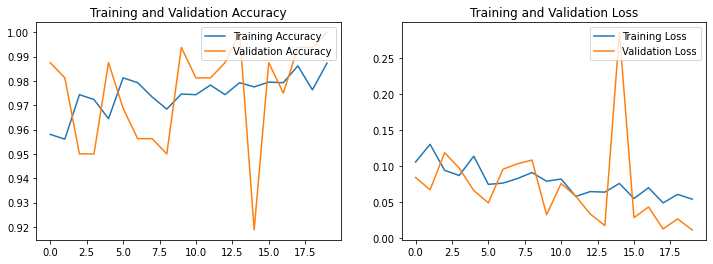

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

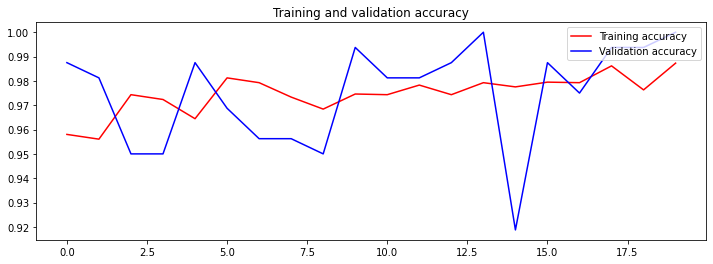

<Figure size 432x288 with 0 Axes>

In [ ]:
acc2 = history.history['accuracy']
val_acc2 = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc2))

plt.figure(figsize=(12, 4))
plt.plot(epochs, acc2, 'r', label='Training accuracy')
plt.plot(epochs, val_acc2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='upper right')
plt.figure()


plt.show()

## 9. Confusion Matrix

Confusion Matrix digunakan untuk mencari performa dalam memprediksi hasil data dengan data aktual.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics

Y_pred = model.predict(valid_generator, BATCH_SIZE+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
confusion_array = sklearn.metrics.confusion_matrix(valid_generator.classes, y_pred)

print('True Negative = ', confusion_array[0,0])
print('False Negative = ', confusion_array[1,0])
print('True Positive = ', confusion_array[1,1])
print('False Positive = ', confusion_array[0,1])

Confusion Matrix
[[35 38 34]
 [37 33 39]
 [36 37 39]]
True Negative =  35
False Negative =  37
True Positive =  33
False Positive =  38


## 10. Classification Report & Rekapitulasi Hasil Data

Classification Report digunakan untuk menampilkan Presisi, Recall, dan F1-Score serta nilai Support.

Kemudian, gunakan rekapitulasi untuk menampilkan hasil evaluasi model data dengan variansi parameter dataset yang digunakan

In [ ]:
print('Classification Report')
target_names = ['Paper', 'Rock', 'Scissors']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       Paper       0.32      0.33      0.33       107
        Rock       0.31      0.30      0.30       109
    Scissors       0.35      0.35      0.35       112

    accuracy                           0.33       328
   macro avg       0.33      0.33      0.33       328
weighted avg       0.33      0.33      0.33       328



In [ ]:
import pandas as pd

evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Valid': [],
                           'Epochs': [],
                           'Batch_Size': [],
                           'Loss': [],
                           'Accuracy': []
})

r = evaluation.shape[0]
evaluation.loc[r] = ['CNN', train_generator.n, valid_generator.n, EPOCHS, BATCH_SIZE, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Valid,Epochs,Batch_Size,Loss,Accuracy
0,CNN,1749.0,328.0,20.0,32.0,0.036228,0.987993


Contoh CNN dalam hal ini adalah pengenalan wajah, klasifikasi gambar dll. Mirip dengan jaringan saraf dasar

Kita Bisa Melihat, disini tingkat akurasi diatas 85%

In [ ]:
dict = {"Model" : evaluation.Model, 
        "Data Train" : evaluation.Data_Train, 
        "Data Valid" : evaluation.Data_Valid, 
        "Epochs" : evaluation.Epochs, 
        "Batch Size" : evaluation.Batch_Size, 
        "Loss" : evaluation.Loss, 
        "Accuracy" : evaluation.Accuracy}

## 11. Memprediksi Model Data yang ada dengan Upload Gambar

Setelah kita mengetahui hasil data tersebut berdasarkan akurasi pada model data. Maka, kita bisa gunakan "upload image" dari Google Colab untuk memprediksi model data yang telah di klasifikasi.

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm (2).png
0bioBZYFCXqJIulm.png
Rock


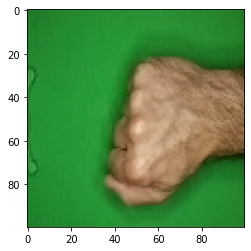

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Paper')
  elif classes[0,1] == 1.0:
    print('Rock')
  else:
    print('Scissors')